In [ ]:
conda install -c conda-forge chemdataextractor

In [1]:
import chemdataextractor

In [2]:
from chemdataextractor import Document

In [3]:
import pubchempy as pcp

In [4]:
import pandas as pd

In [5]:
bio_dic=dict()

In [6]:
def create_dict(fname):
    f = open(fname, 'rb')
    doc = Document.from_file(f)
    l=doc.records.serialize()
    for i in range(len(l)):
        if 'names' in l[i].keys():
            if pcp.get_cids(l[i]['names'][0],'name'):
                bio_dic[pcp.get_cids(l[i]['names'][0],'name')[0]]=l[i]['names']

In [7]:
create_dict('OvarianPaper.pdf')

In [8]:
create_dict('ovarian_cancer.pdf')

In [9]:
create_dict('ovarian_cancer2.pdf')

In [10]:
create_dict('ovarian_cancer3.pdf')

In [11]:
create_dict('ovarian_cancer4.pdf')

In [12]:
create_dict('ovarian_cancer5.pdf')

In [13]:
create_dict('ovarian_cancer6.pdf')

In [14]:
len(bio_dic)

140

In [15]:
from collections import OrderedDict

In [16]:
final_dict=OrderedDict(sorted(bio_dic.items()))

In [17]:
final_dict

OrderedDict([(264, ['fatty acids']),
             (280, ['CO2']),
             (679, ['DMSO', 'dimethyl sulfoxide']),
             (783, ['H']),
             (936, ['nicotinamide', 'Nicotinamide']),
             (947, ['N']),
             (977, ['oxygen']),
             (1720, ['4AN']),
             (2123, ['Hexalen']),
             (2187, ['anastrozole']),
             (2244, ['acetylsalicylic acid']),
             (2349, ['penicillin']),
             (2907, ['cyclophosphamide', 'Cyclophosphamide']),
             (2954, ['DAPI']),
             (3016, ['Dupin']),
             (3385, ['5-fluorouracil']),
             (3690, ['Ifosfamide', 'ifosfamide']),
             (3902, ['letrozole']),
             (4156, ['MMS']),
             (5789, ['thymidine']),
             (5884, ['NADPH']),
             (5950, ['alanine']),
             (5951, ['Ser']),
             (5959, ['CAF']),
             (5960, ['aspartate']),
             (5978, ['vincristine']),
             (5997, ['cholesterol'])

In [18]:
f=open("OvarianCancer_dataset.txt","w")

In [19]:
for k,v in final_dict.items():
    f.write('%s %s\n' % (k,v))
f.close()

In [20]:
dict_df={k:v[0] for k,v in final_dict.items()}

In [8]:
pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13825 sha256=c16865b08e189d614a4a1ea784e88f74e72ba03e19554f8f08338a74f1bb38fc
  Stored in directory: c:\users\vam\appdata\local\pip\cache\wheels\b0\8c\ba\3b00b89931153bf5a4eaa8e73bd1b0319a879cc45175326854
Successfully built pubchempy



In [21]:
df=pd.DataFrame([dict_df.keys(),dict_df.values()])
df=df.T
df=df.rename(columns={df.columns[0]:'CID',df.columns[1]:'Name'})
df

,CID,Name
0,264,fatty acids
1,280,CO2
2,679,DMSO
3,783,H
4,936,nicotinamide
...,...,...
135,135424953,INCB024360
136,135564655,SGI-110
137,135565082,Talazoparib
138,136033680,Poly-ICLC


In [23]:
df["SMILES"]=df['CID'].apply(lambda x:pcp.Compound.from_cid(x).isomeric_smiles)

In [24]:
df

,CID,Name,SMILES
0,264,fatty acids,CCCC(=O)O
1,280,CO2,C(=O)=O
2,679,DMSO,CS(=O)C
3,783,H,[HH]
4,936,nicotinamide,C1=CC(=CN=C1)C(=O)N
...,...,...,...
135,135424953,INCB024360,C1=CC(=C(C=C1N=C(C2=NON=C2N)NO)Cl)F
136,135564655,SGI-110,C1[C@@H]([C@H](O[C@H]1N2C=NC3=C2N=C(NC3=O)N)CO...
137,135565082,Talazoparib,CN1C(=NC=N1)[C@@H]2[C@H](NC3=CC(=CC4=C3C2=NNC4...
138,136033680,Poly-ICLC,C1=CN(C(=O)N=C1N)C2C(C(C(O2)COP(=O)(O)O)O)O.C1...


In [25]:
df.to_excel('OvarianCancer.xlsx')

In [26]:
df=pd.read_excel("OvarianCancer.xlsx")

In [27]:
def test_fn(test):
    l=[]
    for i in test.split():
        if pcp.get_cids(i,'name'):
            if pcp.get_cids(i,'name')[0] in list(df.CID):
                l.append(i)
    return(l)

In [28]:
test1="""Chemotherapy for ovarian cancer is used in neoadjuvant, adjuvant, and maintenance therapy. Agents used include bevacizumab, platinum-based regimens, and poly (ADP-ribose) polymerase (PARP) inhibitors.

Standard postoperative chemotherapy is combination therapy with platinum and paclitaxel. Carboplatin plus paclitaxel is the preferred initial regimen"""

In [29]:
test_fn(test1)

['platinum', 'Carboplatin', 'paclitaxel']

In [30]:
test2="""Drugs Approved for Ovarian, Fallopian Tube, or Primary Peritoneal Cancer
Alkeran (Melphalan)
Avastin (Bevacizumab)
Bevacizumab
Carboplatin
Cisplatin
Cyclophosphamide
Doxorubicin Hydrochloride
Doxil (Doxorubicin Hydrochloride Liposome)
Doxorubicin Hydrochloride Liposome
Gemcitabine Hydrochloride
Gemzar (Gemcitabine Hydrochloride)
Hycamtin (Topotecan Hydrochloride)
Infugem (Gemcitabine Hydrochloride)
Lynparza (Olaparib)
Melphalan
Niraparib Tosylate Monohydrate
Olaparib
Paclitaxel
Paraplatin (Carboplatin)
Rubraca (Rucaparib Camsylate)
Rucaparib Camsylate
Tepadina (Thiotepa)
Thiotepa
Topotecan Hydrochloride
Zejula (Niraparib Tosylate Monohydrate)"""

In [31]:
test_fn(test2)

['Alkeran',
 'Carboplatin',
 'Cisplatin',
 'Cyclophosphamide',
 'Doxorubicin',
 'Doxil',
 'Doxorubicin',
 'Gemcitabine',
 'Gemzar',
 'Lynparza',
 'Melphalan',
 'Niraparib',
 'Olaparib',
 'Paclitaxel',
 'Paraplatin',
 'Rubraca',
 'Rucaparib',
 'Topotecan',
 'Zejula']

In [32]:
interactions=pd.read_excel('stitch_interactions.xlsx')

In [33]:
interactions

,node1,node2,node1_string_internal_id,node2_string_internal_id,node1_external_id,node2_external_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,prediction,combined_score
0,CAT,oxygen,1843587,-977,9606.ENSP00000241052,-1.CID000000977,0.0,0,0.0,0.0,0.0,0.690,0.9,0.992,0.0,0.999
1,CYP19A1,letrozole,1844790,-3902,9606.ENSP00000260433,-1.CID000003902,0.0,0,0.0,0.0,0.0,0.960,0.9,0.988,0.0,0.999
2,PTGS2,aspirin,1854602,-2244,9606.ENSP00000356438,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.643,0.9,0.980,0.0,0.999
3,PTGS1,aspirin,1854170,-2244,9606.ENSP00000354612,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.725,0.9,0.986,0.0,0.999
4,CYP19A1,anastrozole,1844790,-2187,9606.ENSP00000260433,-1.CID000002187,0.0,0,0.0,0.0,0.0,0.919,0.9,0.986,0.0,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,TYMS,AKT1,1849803,1846136,9606.ENSP00000315644,9606.ENSP00000270202,0.0,0,0.0,0.0,0.0,0.000,0.0,0.197,0.0,0.197
657,GART,NOS3,1857440,1847875,9606.ENSP00000371236,9606.ENSP00000297494,0.0,0,0.0,0.0,0.0,0.000,0.0,0.187,0.0,0.187
658,MTHFR,AKT1,1856524,1846136,9606.ENSP00000365775,9606.ENSP00000270202,0.0,0,0.0,0.0,0.0,0.000,0.0,0.168,0.0,0.167
659,TYMS,carboplatin-pa.,1849803,-11542699,9606.ENSP00000315644,-1.CID011542699,0.0,0,0.0,0.0,0.0,0.000,0.0,0.163,0.0,0.163


In [34]:
interactions.shape

(661, 16)

In [35]:
interactions.head(5)

,node1,node2,node1_string_internal_id,node2_string_internal_id,node1_external_id,node2_external_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,prediction,combined_score
0,CAT,oxygen,1843587,-977,9606.ENSP00000241052,-1.CID000000977,0.0,0,0.0,0.0,0.0,0.690,0.9,0.992,0.0,0.999
1,CYP19A1,letrozole,1844790,-3902,9606.ENSP00000260433,-1.CID000003902,0.0,0,0.0,0.0,0.0,0.960,0.9,0.988,0.0,0.999
2,PTGS2,aspirin,1854602,-2244,9606.ENSP00000356438,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.643,0.9,0.980,0.0,0.999
3,PTGS1,aspirin,1854170,-2244,9606.ENSP00000354612,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.725,0.9,0.986,0.0,0.999
4,CYP19A1,anastrozole,1844790,-2187,9606.ENSP00000260433,-1.CID000002187,0.0,0,0.0,0.0,0.0,0.919,0.9,0.986,0.0,0.999


In [36]:
DF=interactions

In [37]:
DF=DF[DF["node1_external_id"].apply(lambda x:x.split('.')[0])!=DF["node2_external_id"].apply(lambda x:x.split('.')[0])]

In [38]:
DF.shape

(244, 16)

In [39]:
DF['label']=DF['combined_score'].apply(lambda x:int(x>=0.7))

<ipython-input-39-eef8faed1bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['label']=DF['combined_score'].apply(lambda x:int(x>=0.7))


In [40]:
DF

,node1,node2,node1_string_internal_id,node2_string_internal_id,node1_external_id,node2_external_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,prediction,combined_score,label
0,CAT,oxygen,1843587,-977,9606.ENSP00000241052,-1.CID000000977,0.0,0,0.0,0.0,0.0,0.690,0.9,0.992,0.0,0.999,1
1,CYP19A1,letrozole,1844790,-3902,9606.ENSP00000260433,-1.CID000003902,0.0,0,0.0,0.0,0.0,0.960,0.9,0.988,0.0,0.999,1
2,PTGS2,aspirin,1854602,-2244,9606.ENSP00000356438,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.643,0.9,0.980,0.0,0.999,1
3,PTGS1,aspirin,1854170,-2244,9606.ENSP00000354612,-1.CID000002244,0.0,0,0.0,0.0,0.0,0.725,0.9,0.986,0.0,0.999,1
4,CYP19A1,anastrozole,1844790,-2187,9606.ENSP00000260433,-1.CID000002187,0.0,0,0.0,0.0,0.0,0.919,0.9,0.986,0.0,0.999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,CHKA,etarfolatide,1845785,-12000662,9606.ENSP00000265689,-1.CID012000662,0.0,0,0.0,0.0,0.0,0.000,0.0,0.834,0.0,0.834,1
631,NOS3,folic acid,1847875,-3405,9606.ENSP00000297494,-1.CID000003405,0.0,0,0.0,0.0,0.0,0.000,0.0,0.824,0.0,0.824,1
633,DCK,pemetrexed,1847023,-60843,9606.ENSP00000286648,-1.CID000060843,0.0,0,0.0,0.0,0.0,0.000,0.0,0.823,0.0,0.823,1
635,GART,folic acid,1857440,-3405,9606.ENSP00000371236,-1.CID000003405,0.0,0,0.0,0.0,0.0,0.000,0.0,0.760,0.0,0.760,1


In [41]:
DF.groupby('label')['node2'].count()

label
0    146
1     98
Name: node2, dtype: int64

In [42]:
DF=DF.sort_values(by=['label'])

In [43]:
Negative=DF.iloc[:146,[1,16]]
Positive=DF.iloc[146:,[1,16]]

In [44]:
Negative

,node2,label
659,carboplatin-pa.,0
337,gold,0
339,S-adenosylmeth.,0
341,buthionine sul.,0
343,taxol,0
...,...,...
173,cyclophosphami.,0
172,aspartate,0
171,carbon dioxide,0
170,penicillin,0


In [45]:
Negative.drop_duplicates(inplace=True)
len(Negative)

45

In [46]:
Negative['CID']=Negative['node2'].apply(lambda x:pcp.get_cids(x) or pd.NaT)

In [47]:
Negative=Negative.dropna()
len(Negative)

34

In [48]:
Negative['CID']=Negative['CID'].apply(lambda x:x[0])

<ipython-input-48-c6e794d5b1b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negative['CID']=Negative['CID'].apply(lambda x:x[0])


In [49]:
Negative

,node2,label,CID
337,gold,0,23985
343,taxol,0,36314
345,capecitabine,0,60953
510,Pd180970,0,5311104
506,goserelin,0,5311128
505,tamoxifen,0,2733526
504,actinomycin D,0,457193
503,erlotinib,0,176870
498,lapatinib,0,208908
497,cisplatin,0,5702198


In [50]:
Positive

,node2,label
633,pemetrexed,1
631,folic acid,1
630,etarfolatide,1
629,SAR3419,1
628,pemetrexed,1
...,...,...
288,vinblastine,1
287,vinblastine,1
286,vinblastine,1
284,capecitabine,1


In [51]:
Positive.drop_duplicates(inplace=True)
len(Positive)

38

In [52]:
Positive['CID']=Positive['node2'].apply(lambda x:pcp.get_cids(x) or pd.NaT)

In [54]:
!pip install py2cytoscape

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for py2cytoscape: filename=py2cytoscape-0.7.1-py3-none-any.whl size=78811 sha256=8846bb1a2843e4916cf54110575ee736d62d4f91aefed36bf08d2fdd260627af
  Stored in directory: c:\users\vam\appdata\local\pip\cache\wheels\5c\c3\5b\76436ed5d5c54edcb37239175c9e978c7994ffc9f9b5f8472a
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=af55a30114d8c25fde6ddc6c2a2b2df3056de601a8647e2499acea5afaaa7846
  Stored in directory: c:\users\vam\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
  Created wheel for python-igraph: filename=python_igraph-0.9.8-py3-none-any.whl size=9054 sha256=056e3a235eaafd9a2049dace8525ae55308aba309c2a4a3bff0fd7595e5c7e98
  Stored in directory: c:\users\vam\appdata\local\pip\cache\wheels\f9\14\00\acd6e2e744895a9833123220e47f6f947a423f26e66fc9e4fd
Successfully built py2cytoscape pydotplus python-igraph


In [69]:
import os
import sys
from time import sleep
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from py2cytoscape import cyrest
from IPython.display import Image
%matplotlib inline

In [70]:
cytoscape=cyrest.cyclient()
cytoscape.version()

apiVersion v1
cytoscapeVersion 3.8.2


In [71]:
cytoscape.session.new()

In [72]:
cytoscape.vizmap.apply(styles="default")

{'views': [61]}

In [73]:
from py2cytoscape.cyrest.base import api

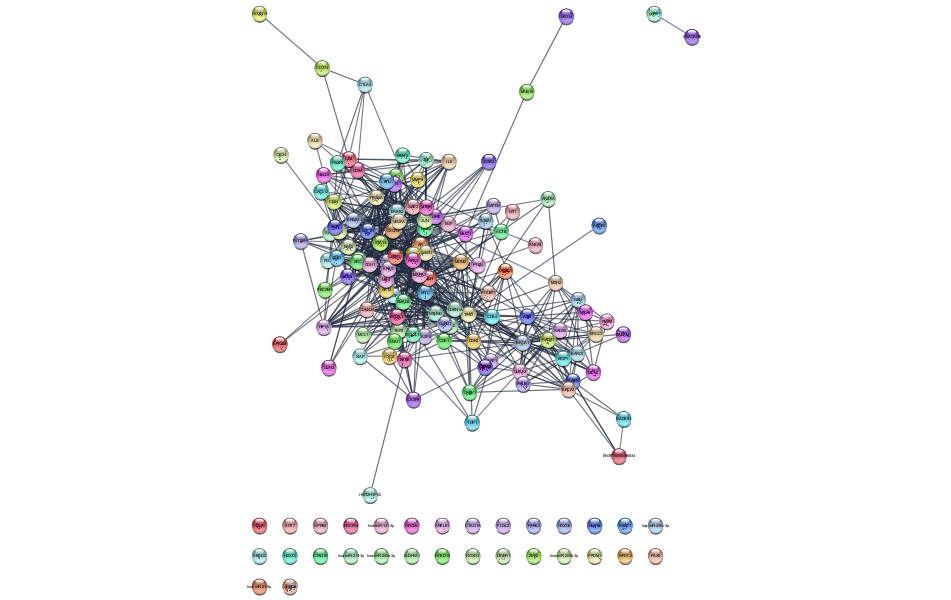

In [74]:
api(namespace="string",command="disease query",PARAMS={"disease":"ovarian cancer","cutoff":"0.9",
                                                       "species":"Homo sapiens","limit":"150"})
sleep(4)
fig=cytoscape.networks.getFirstImageAsPng(networkId=cytoscape.network.get()["SUID"],h=None)
Image(fig.content)

In [75]:
cytoscape.network.list()

{'networks': [51, 78]}

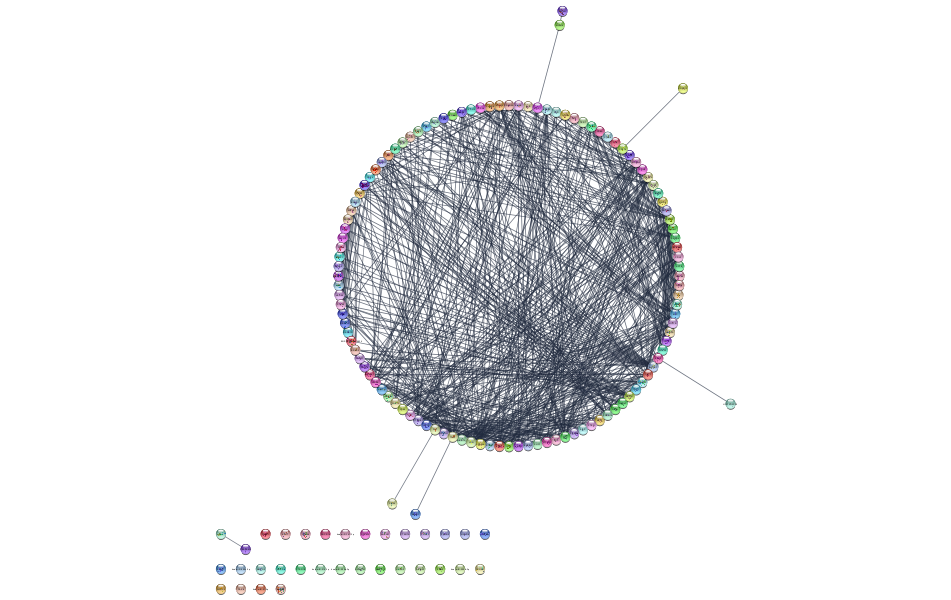

In [76]:
cytoscape.layout.circular()
sleep(2)
fig=cytoscape.networks.getFirstImageAsPng(networkId=cytoscape.network.get()["SUID"],h=None)
Image(fig.content)

In [64]:
cytoscape.node.list_attributes()

['SUID',
 'shared name',
 'name',
 'selected',
 'stringdb::canonical name',
 'display name',
 'stringdb::full name',
 'stringdb::database identifier',
 'stringdb::description',
 '@id',
 'stringdb::namespace',
 'stringdb::node type',
 'query term',
 'stringdb::sequence',
 'stringdb::species',
 'stringdb::STRING style',
 'stringdb::enhancedLabel Passthrough',
 'compartment::cytoskeleton',
 'compartment::cytosol',
 'compartment::endoplasmic reticulum',
 'compartment::endosome',
 'compartment::extracellular',
 'compartment::golgi apparatus',
 'compartment::lysosome',
 'compartment::mitochondrion',
 'compartment::nucleus',
 'compartment::peroxisome',
 'compartment::plasma membrane',
 'stringdb::structures',
 'target::development level',
 'target::family',
 'tissue::adrenal gland',
 'tissue::blood',
 'tissue::bone',
 'tissue::bone marrow',
 'tissue::eye',
 'tissue::gall bladder',
 'tissue::heart',
 'tissue::intestine',
 'tissue::kidney',
 'tissue::liver',
 'tissue::lung',
 'tissue::muscle',


In [65]:
disease_score_table=cytoscape.table.getTable(columns=['stringdb::disease score'],table='node')
disease_score_table.head()

,stringdb::disease score
9606.ENSP00000262643,2.586459
9606.ENSP00000263334,3.183493
9606.hsa-miR-21-5p,2.631779
9606.ENSP00000369497,5.000000
9606.ENSP00000405330,3.090170


In [66]:
disease_score_table=cytoscape.table.getTable(columns=['tissue::heart'],table='node')
disease_score_table.head()

,tissue::heart
9606.ENSP00000262643,2.653615
9606.ENSP00000263334,1.562638
9606.hsa-miR-21-5p,2.590115
9606.ENSP00000369497,2.167997
9606.ENSP00000405330,2.642111
